4 Coordinate Model

In [47]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
# get the main paths
df = pd.read_csv('../simulations/data/small_trajectories.csv')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     280 non-null    int64  
 1   name           280 non-null    object 
 2   latitude_1     280 non-null    float64
 3   longitude_1    280 non-null    float64
 4   latitude_2     280 non-null    float64
 5   longitude_2    280 non-null    float64
 6   latitude_3     280 non-null    float64
 7   longitude_3    280 non-null    float64
 8   latitude_4     280 non-null    float64
 9   longitude_4    280 non-null    float64
 10  enter-parking  280 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 24.2+ KB


In [50]:
df.head()

,Unnamed: 0,name,latitude_1,longitude_1,latitude_2,longitude_2,latitude_3,longitude_3,latitude_4,longitude_4,enter-parking
0,0,1_A_Missed,36.110406,-115.141087,36.110440,-115.141107,36.110466,-115.141131,36.110496,-115.141159,0
1,1,2_A_Missed,36.110411,-115.141099,36.110430,-115.141109,36.110452,-115.141130,36.110475,-115.141151,0
2,2,3_A_Missed,36.110411,-115.141082,36.110435,-115.141093,36.110457,-115.141110,36.110483,-115.141131,0
3,3,4_A_Missed,36.110432,-115.141133,36.110458,-115.141153,36.110487,-115.141167,36.110518,-115.141178,0
4,4,5_A_Missed,36.110441,-115.141155,36.110463,-115.141168,36.110485,-115.141176,36.110509,-115.141185,0


In [51]:
# Split up
def split_data(amount, data):
    """
    Splits the columns of the data and returns a new data frame
    Args:
        amount:

    Returns:

    """
    # Create dataframe columns first
    columns = []
    for index in range(1, amount + 1):
        latitude = 'latitude_' + str(index)
        longitude = 'longitude_' + str(index)
        altitude = 'altitude_relative_to_ground_' + str(index)
        columns.append(latitude)
        columns.append(longitude)
        columns.append(altitude)

    columns.append('enter-parking')

    coord1 = data[data.columns[2:14]].values
    coord1 = np.column_stack((coord1, data['enter-parking'].values))

    coord2 = data[data.columns[14:26]].values
    coord2 = np.column_stack((coord2, data['enter-parking'].values))

    coord3 = data[data.columns[26:38]].values
    coord3 = np.column_stack((coord3, data['enter-parking'].values))

    coord4 = data[data.columns[38:50]].values
    coord4 = np.column_stack((coord4, data['enter-parking'].values))

    coord5 = data[data.columns[50:62]].values
    coord5 = np.column_stack((coord5, data['enter-parking'].values))

    all_coords = np.concatenate((coord1, coord2, coord3, coord4, coord5), axis=0)

    new_data = pd.DataFrame(all_coords, columns=columns)

    new_data = new_data.astype({'enter-parking': np.int})

    return new_data

# new_df = split_data(4, df)

In [52]:
# Get The cordinates for x
x = df[df.columns[2:10]]

# Get the last coordinate
y = df['enter-parking'].values

In [53]:
print(x)
print(y)

     latitude_1  longitude_1  latitude_2  longitude_2  latitude_3  \
0     36.110406  -115.141087   36.110440  -115.141107   36.110466   
1     36.110411  -115.141099   36.110430  -115.141109   36.110452   
2     36.110411  -115.141082   36.110435  -115.141093   36.110457   
3     36.110432  -115.141133   36.110458  -115.141153   36.110487   
4     36.110441  -115.141155   36.110463  -115.141168   36.110485   
..          ...          ...         ...          ...         ...   
275   36.110501  -115.139464   36.110536  -115.139494   36.110561   
276   36.110545  -115.139474   36.110576  -115.139514   36.110621   
277   36.110592  -115.139487   36.110610  -115.139521   36.110632   
278   36.110570  -115.139875   36.110589  -115.139847   36.110623   
279   36.110560  -115.139734   36.110574  -115.139757   36.110587   

     longitude_3  latitude_4  longitude_4  
0    -115.141131   36.110496  -115.141159  
1    -115.141130   36.110475  -115.141151  
2    -115.141110   36.110483  -115.1411

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=63)

In [55]:
# Scale data
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [56]:
x_train.shape

(210, 8)

In [57]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# Model creation
model = Sequential()

# 8 neurons for input layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(6, activation='relu'))
model.add(Dropout(0.3))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])

/home/mikey/PycharmProjects/smart-park/venv/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [58]:
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=200,
                    validation_data=(x_test, y_test),
                    callbacks=early_stop,
                    shuffle=True)

Epoch 1/200
7/7 [==============================] - 1s 34ms/step - loss: 0.7174 - accuracy: 0.5143 - val_loss: 0.6888 - val_accuracy: 0.5714
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 0.7105 - accuracy: 0.4762 - val_loss: 0.6883 - val_accuracy: 0.5714
Epoch 3/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.5238 - val_loss: 0.6839 - val_accuracy: 0.6429
Epoch 4/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6753 - accuracy: 0.5905 - val_loss: 0.6755 - val_accuracy: 0.6571
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6594 - accuracy: 0.5571 - val_loss: 0.6776 - val_accuracy: 0.5429
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6678 - accuracy: 0.5190 - val_loss: 0.6612 - val_accuracy: 0.5

In [59]:
losses = pd.DataFrame(model.history.history)

In [60]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

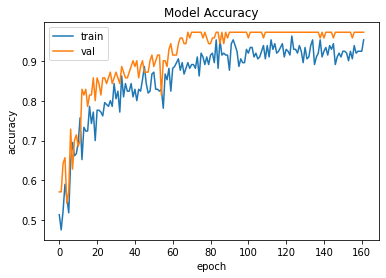

In [61]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

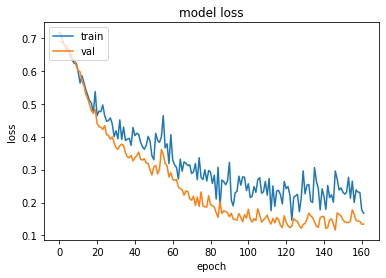

In [62]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [63]:
test_df = pd.read_csv('../simulations/data/test_small_trajectories.csv')

In [64]:
test_x = test_df[test_df.columns[2:10]]

test_y = test_df['enter-parking'].values

In [65]:
test_x = scaler.transform(test_x)

In [66]:
print(test_x)

print(test_y)

[[0.02856757 0.16115389 0.03550305 0.16809372 0.03807671 0.17828669
  0.03485086 0.19376837]
 [0.14458135 0.17393209 0.1597797  0.17769277 0.1606351  0.18853462
  0.15183747 0.20343704]
 [0.63478985 0.12730248 0.62089096 0.14497129 0.58999398 0.1682568
  0.54387019 0.19417115]
 [0.59898014 0.14763762 0.59588387 0.16276619 0.5672564  0.18335687
  0.52209308 0.21003226]
 [0.64619431 0.20715227 0.64854303 0.21869748 0.62828711 0.23239626
  0.58540548 0.25100045]
 [0.28283726 0.18790301 0.30271247 0.18944256 0.31105835 0.19976634
  0.29602531 0.21540958]
 [0.57430051 0.83106724 0.63549838 0.79752532 0.68841995 0.76714807
  0.71523035 0.74560314]
 [0.7637002  0.83511628 0.8104658  0.79919668 0.82983482 0.76379922
  0.80900606 0.73219187]
 [0.50345111 0.82863452 0.55916104 0.78818857 0.5788631  0.76718067
  0.57492109 0.74965969]
 [0.70483846 0.12062526 0.68797495 0.14693992 0.65901324 0.18909864
  0.62063323 0.22509293]
 [0.63999733 0.85485638 0.68218149 0.81877399 0.71686624 0.78635699
  0

In [67]:
predictions = (model.predict(test_x) > 0.5).astype("int32")

print(predictions)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]


In [68]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.88      1.00      0.93        14

    accuracy                           0.92        25
   macro avg       0.94      0.91      0.92        25
weighted avg       0.93      0.92      0.92        25



In [69]:
print(confusion_matrix(test_y, predictions))

[[ 9  2]
 [ 0 14]]
